# Low-Level Analysis
Jana Bruses | janabruses@pitt.edu | University of Pittsburgh | Apr. 3rd - ...

This analysis aims to quantify the linguistic markers of Catalan language substitution by measuring specific changes over time.\
The following exploration looks at lower-level linguistic symptoms (morphological, syntactic, lexical, and semantic).\
For higher-level/text characteristics that could indicate increasing convergence with Spanish check the notebook [Analysis-2-TextLevel](https://github.com/Data-Science-for-Linguists-2025/Linguistic-Markers-Catalan-Substitution/blob/main/Analysis-2-TextLevel.ipynb).\
The data colection and dataframe building process used for this analysis can be found in [Data-Parsing-Exploratory-Analysis-2](https://github.com/Data-Science-for-Linguists-2025/Linguistic-Markers-Catalan-Substitution/blob/main/Data-Parsing-Exploratory-Analysis-2.ipynb), that now will be loaded from their pickled form as our data.

Contents of this analysis notebook:\
**0** [Recap Data Analysis](#Quick-recap-analysis-to-refresh-our-memory)\
**1** [Loss of Word Classes](#1.-Loss-of-word-classes---pronoms-febles)\
**2** [Time/Space Lexicon](#2.-Time-and-space-lexicon-modification)\
**3** [Syntactic Restructuring](#3.-Syntactic-restructuring)\
**4** [Low-Level Analysis Conclusion and Findings](#4.-Low-Level-Analysis-Conclusion-and-Findings) 

In [19]:
# loading libraries
import pandas as pd
import re
import matplotlib.pyplot as plt

In [20]:
# loading the pickled complete dataframe 
tokscomplete_df = pd.read_pickle("tokcomplete_df.pkl")

In [21]:
# keeping only the columns we are interested in
tokscomplete_df = tokscomplete_df[["Year", "Line_id", "Text", "Text_len", "toks", "Len_toks"]]

### Quick recap analysis to refresh our memory

In [22]:
# quick recap data on the dataframe
print("There are", tokscomplete_df.shape, "pieces of text")
print("The total of tokens in the dataframe is:", tokscomplete_df["Len_toks"].sum())

There are (75480, 6) pieces of text
The total of tokens in the dataframe is: 3063943


In [23]:
tokscomplete_df.describe()

,Year,Text_len,Len_toks
count,75480.000000,75480.000000,75480.000000
mean,2008.832658,187.739043,40.592780
std,3.064608,611.358140,122.724208
min,1860.000000,0.000000,0.000000
25%,2008.000000,38.000000,9.000000
50%,2009.000000,95.000000,21.000000
75%,2010.000000,222.000000,48.000000
max,2022.000000,73881.000000,14727.000000


**Comment:**\
The total amount of data in tokens we are working with is about three million tokens.\
The olderst text we have data from is from 1860, while the most recent dates from 2022.\
The distribution of the data leans more towards recent texts as the mean date of pieces of text is 2008.

**A note on the following analysis**\
Because of the difference in data sizes for each year, and in the distribution of our data, all counts will be evaluated considering the size of the amount of tokens of the year they belong to.\
To do so we will work always considering the proportion of data this counts represent in the overall data amount for the respective year, as a percentage.

With this consideration in mind we will now start the analysis:

## 1. Loss of word classes - pronoms febles

Following Dr. Junyent's idea that one of the key warnings of a language endangerement's is the loss of word classes we will conduct a frequency exploration of Pronoms Febles as our target word class. Specifically we will take a close look at the **"hi"** pronoun that can't be found in Spanish and might be dropped to copy Spanish's structures.\
"en" is another "pronom feble" not found in Spanish, however, as "en" is a word that has many other functions and would be harder to identify we will focus on "hi".\
The following examples and explanations on the pronoun "hi" have been guided by, taken from and translated [els-pronoms-son-vida](https://www.vilaweb.cat/noticies/els-pronoms-son-vida/), an article on the lead online Catalan's newspaper written by the Catalan philologist Jordi Badia i Pujol, who does an amazing job presenting "en" and "hi", cornerstones of Catalan, naming them "the life of Catalan."

### Mini grammatical background for **"hi"**

It's a pronoun is used to replace complements starting with any preposition other than "de" (which would be replaced by "en")\
For example:\
Demà anem al pis. ---> Demà hi anem\
*We are going to the flat tomorrow ---> We are going "to it" tomorrow
"hi" = al pis/*the flat*

Some examples of some of the most common situations in which this pronoun is being forgotten:
* Sé que t’esperen a la piscina, però no pots anar -> no hi pots anar
* Demà hi ha la festa, però jo no estaré -> no hi seré
* Sí que està, però ara no es pot posar -> Sí que hi és, però ara no s’hi pot posar
* Avui pot haver una desgràcia -> Avui pot haver-hi una desgràcia

Less common examples are:
* He llegit el text, però no he canviat res ---> però no hi he canviat res
* A sota de cada objecte, escriviu el nom que li correspongui ---> escriviu el nom que hi correspongui

Example sentences that we are building from Spanish influence instead of using a pronoun:
* Vam trobar una botiga i ens vam arrecerar en ella ---> i ens hi vam arrecerar
* Va conèixer Fuster el 1970 i es va començar a relacionar amb aquest ---> i s’hi va començar a relacionar\

Looking at these examples, we can see that what we need to scan the text for is "hi" and "-hi".

In [24]:
# lowering the token list 
tokscomplete_df["toks_low"] = tokscomplete_df["toks"].apply(lambda x: [w.lower() for w in x])

In [25]:
# creating a function to find pronom febles and their context
def get_pf(tok_list, pf_target):
    '''
    takes in a token list and a pronom feble as target
    returns a list of tupples
    (preceding word, target pronom feble, following word)
    '''
    found = [(tok_list[tok_list.index(word)-1], word, tok_list[tok_list.index(word)+1]) 
             for word in tok_list if re.fullmatch(pf_target, word) and tok_list.index(word) < len(tok_list)-1]
    return set(found)

In [26]:
# finding the "hi" pronom feble
tokscomplete_df["hi"] = tokscomplete_df["toks_low"].apply(lambda x: get_pf(x, r"hi"))
tokscomplete_df["-hi"] = tokscomplete_df["toks_low"].apply(lambda x: get_pf(x, r".*-hi"))

In [27]:
# initially the idea was to also scan for "en" but due to its multiple functions, this section has been commented out
#tokscomplete_df["en"] = tokscomplete_df["toks_low"].apply(lambda x: get_pf(x, r"en"))
#tokscomplete_df["se'n"] = tokscomplete_df["toks_low"].apply(lambda x: get_pf(x, r"se'n"))
#tokscomplete_df["n'"] = tokscomplete_df["toks_low"].apply(lambda x: get_pf(x, r"n[’']"))
#tokscomplete_df["-ne"] = tokscomplete_df["toks_low"].apply(lambda x: get_pf(x, r".*-ne"))

In [28]:
tokscomplete_df.head(2)

,Year,Line_id,Text,Text_len,toks,Len_toks,toks_low,hi,-hi
0,1926,Discurs llegit per... donar a conèxer la perso...,"L'home que per amor al estudi, impulsat per un...",37497,"[L', home, que, per, amor, al, estudi, ,, impu...",7267,"[l', home, que, per, amor, al, estudi, ,, impu...","{(n', hi, hagi)}",{}
1,1920,Parlament llegit en la festa inaugural de l'Or...,"Cantaires de la Garriga, Senyores i senyors:\n...",9253,"[Cantaires, de, la, Garriga, ,, Senyores, i, s...",1865,"[cantaires, de, la, garriga, ,, senyores, i, s...","{(m', hi, vaig)}",{}


In [29]:
# adding a count column for hi pronouns per text line
tokscomplete_df["hi_count"] = tokscomplete_df["hi"].apply(len)+tokscomplete_df["-hi"].apply(len)

In [30]:
tokscomplete_df.head(2)

,Year,Line_id,Text,Text_len,toks,Len_toks,toks_low,hi,-hi,hi_count
0,1926,Discurs llegit per... donar a conèxer la perso...,"L'home que per amor al estudi, impulsat per un...",37497,"[L', home, que, per, amor, al, estudi, ,, impu...",7267,"[l', home, que, per, amor, al, estudi, ,, impu...","{(n', hi, hagi)}",{},1
1,1920,Parlament llegit en la festa inaugural de l'Or...,"Cantaires de la Garriga, Senyores i senyors:\n...",9253,"[Cantaires, de, la, Garriga, ,, Senyores, i, s...",1865,"[cantaires, de, la, garriga, ,, senyores, i, s...","{(m', hi, vaig)}",{},1


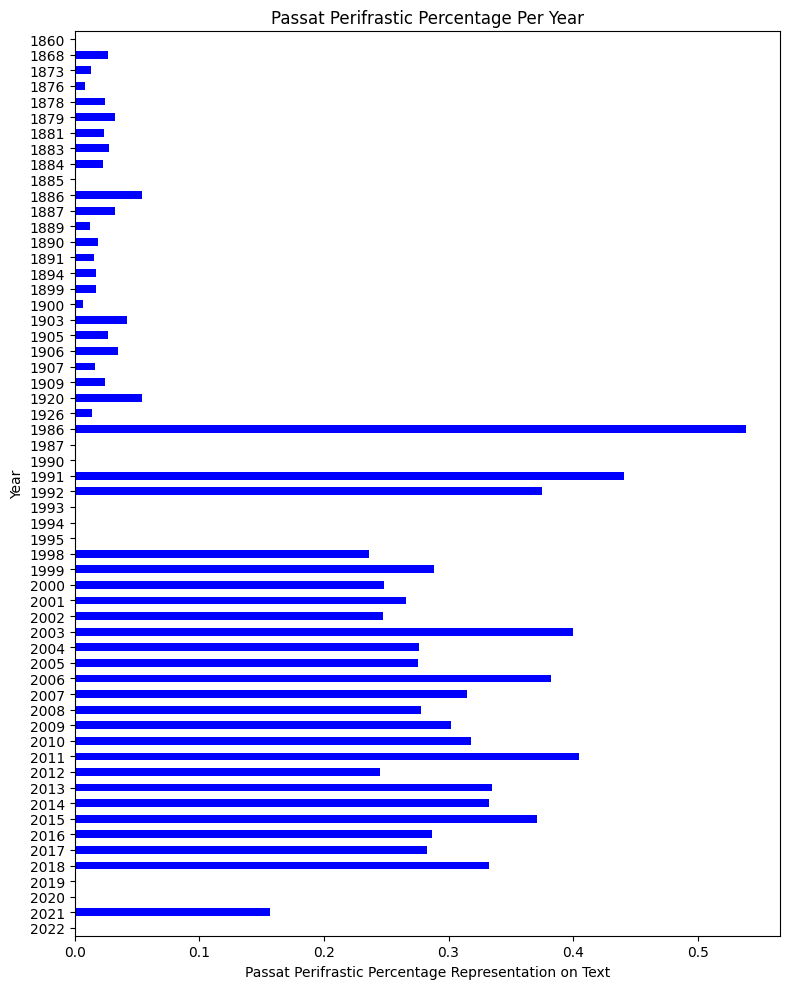

In [31]:
# plotting the "hi" distribution per year

# grouping by year
# summing the "hi" counts
# divinding by the token count for that year
# multiplying by 100 to get the precentage
hi_grouped = (tokscomplete_df.groupby("Year")["hi_count"].sum()/tokscomplete_df.groupby("Year")["Len_toks"].sum())*100

plt.figure(figsize=(8, 10))
hi_grouped.plot(kind="barh", color="blue")
plt.xlabel("Passat Perifrastic Percentage Representation on Text")
plt.ylabel("Year")
plt.title("Passat Perifrastic Percentage Per Year")
plt.gca().invert_yaxis()  # Opcional, per invertir l'ordre de les etiquetes
plt.tight_layout()
plt.show()

## 2. Time and space lexicon modification

### 2.1 Directional distinction in anar and venir

### 2.2 Shift from "perifrastic" past to simple past

**A bit of grammar background on the perifrastic past:**

The Perifrastic Past in Catalan is a verb tense used to express past tense actions that were done in the past and have been finished.\
It is characteristic and a cornestone of Catalan as no neolatin language uses a Perifrastic Past.\
It has the same value and sense as Simple Past. In English *"I went"*.\
It is formed with the auxiliary form of the verb "anar" and the main verb in its infinitive form.\
Anar (to go) is conjugated in the present tense.
| **Pattern:** | **(subj)** | **present tense anar** | **main verb inf** |
|:---|:---|:---|:---|
|(1st Sing.) | Jo	| vaig | parlar |
|(2nd Sing.) | Tu	| vas/vares | parlar |
|(3rd Sing.) | Ell/Ella | va | parlar |
|(1st Plur.) | Nosaltres | vam/vàrem | parlar |
|(2nd Plur.) | Vosaltres | vau/vàreu | parlar |
|(3rd Plur.) | Ells / Elles |	van/varen |	parlar |

\
Another note, that will be helpful in our search for this tense is that all infinitives in Catalan belong to one of 3 conjugations that have a particular ending syllable.\
Inifitive form verbs of the **first conjugation** finish in **"-ar"**, as the previous example "parlar" or for another example "menjar".\
**Second conjugation** verbs infinitives' end in **"-er"** like "saber" or **"-re"** like "pretendre".\
**Third conjugugation** infinitives end in **"-ir"** like "dormir".

All forms follow this rule and there are no irregulars.\
The only caveat are the following 2nd conjugation verbs, that have 2 accepted forms:\
Valer and valdre\
Caler and caldre\
Caber and cabre

However, this does not suppose a problem for our analysis.

Given the strong regularity of this verb let's go straight into takeling the perifrastic past hunt.

In [32]:
# creating a function to find pronom febles and their context
def get_pstperif(text):
    '''
    takes in a text and returns a list of found "passat perifrastic" forms in the text
    '''
    # Regex pattern breakdown:
    # \b word boundary to ensure matching whole words
    # (?:...) non-capturing group for the initial verb forms
    # \S* zero or more non-whitespace characters
    # (?:ar|er|re|ir) non-capturing group to ensure the token ends with one of these suffixes
    target = r"\b(?:vaig|vas|vares|va|vam|vàrem|vau|vàreu|van|varen)\s+\w+(?:ar|er|re|ir)"
    found = re.findall(target, text, flags=re.IGNORECASE)
    return found

In [33]:
# getting all passat perifrastics forms as a list and storing them in a column
tokscomplete_df["PstPerif"] = tokscomplete_df["Text"].apply(get_pstperif)

In [34]:
# counting the passat perifrastic forms per row and storing that count as a new column
tokscomplete_df["Pstp_count"] = tokscomplete_df["PstPerif"].apply(len)

In [35]:
# checking the new columns
tokscomplete_df.head(2)

,Year,Line_id,Text,Text_len,toks,Len_toks,toks_low,hi,-hi,hi_count,PstPerif,Pstp_count
0,1926,Discurs llegit per... donar a conèxer la perso...,"L'home que per amor al estudi, impulsat per un...",37497,"[L', home, que, per, amor, al, estudi, ,, impu...",7267,"[l', home, que, per, amor, al, estudi, ,, impu...","{(n', hi, hagi)}",{},1,"[va dedicar, va erigir, va fer, va interrogar,...",35
1,1920,Parlament llegit en la festa inaugural de l'Or...,"Cantaires de la Garriga, Senyores i senyors:\n...",9253,"[Cantaires, de, la, Garriga, ,, Senyores, i, s...",1865,"[cantaires, de, la, garriga, ,, senyores, i, s...","{(m', hi, vaig)}",{},1,"[vaig ésser, vaig començar, vaig trobar, vàrem...",4


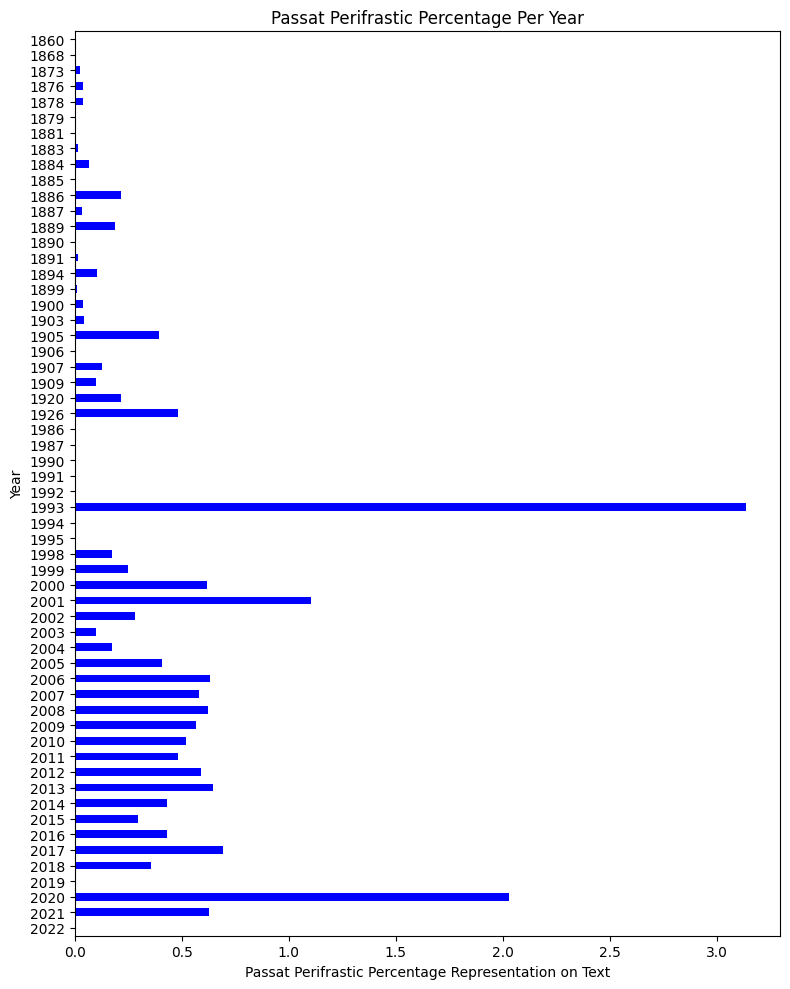

In [36]:
# grouping by year
# summing the "passat perifrastic" counts
# divinding by the token count for that year
# multiplying by 100 to get the precentage
df_grouped = (tokscomplete_df.groupby("Year")["Pstp_count"].sum()/tokscomplete_df.groupby("Year")["Len_toks"].sum())*100

plt.figure(figsize=(8, 10))
df_grouped.plot(kind="barh", color="blue")
plt.xlabel("Passat Perifrastic Percentage Representation on Text")
plt.ylabel("Year")
plt.title("Passat Perifrastic Percentage Per Year")
plt.gca().invert_yaxis()  # Opcional, per invertir l'ordre de les etiquetes
plt.tight_layout()
plt.show()

### 2.3 Pronominalization of movement verbs

## 3. Syntactic restructuring

### 3.2 Tenir que vs haver de

## 4. Low-Level Analysis Conclusion and Findings